In [64]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [65]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [66]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [67]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     180 non-null    object        
 1   month      180 non-null    int32         
 2   year       180 non-null    int32         
 3   tb         180 non-null    int64         
 4   longitude  180 non-null    float64       
 5   latitude   180 non-null    float64       
 6   time       180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 8.6+ KB


Merapihkan Data TB 2020-2023

In [68]:
import calendar

In [69]:
# Filter for years 2020-2022
df_tb = df_excel[(df_excel['year'] >= 2020) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT, month, and time
tb_total = df_tb.groupby(['KABKOT', 'month', 'time'])['tb'].sum()
tb_total

KABKOT         month  time      
JAKARTA BARAT  1      2020-01-01    715
                      2021-01-01    329
                      2022-01-01    851
               2      2020-02-01    803
                      2021-02-01    326
                                   ... 
JAKARTA UTARA  11     2021-11-01    475
                      2022-11-01    685
               12     2020-12-01    201
                      2021-12-01    450
                      2022-12-01    671
Name: tb, Length: 180, dtype: int64

Merapihkan Data PM 10 2020-2023

In [70]:
df_pm10 = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/PM_10/dissolved_result_pm10_3years.csv')
df_pm10 = df_pm10.drop(['Unnamed: 0'], axis=1)
print(df_pm10.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'pm10', 'time'], dtype='object')


In [71]:
# Filter for years 2018-2022
df_pm10 = df_pm10[(df_pm10['year'] >= 2020) & (df_pm10['year'] <= 2022)]

# Group pm10_mean by KABKOT, month, and time
pm10_mean = df_pm10.groupby(['KABKOT', 'month', 'time'])['pm10'].mean()
pm10_mean

KABKOT         month  time      
JAKARTA BARAT  1      2020-01-01    56.164344
                      2021-01-01    55.754458
                      2022-01-01    57.999436
               2      2020-02-01    55.080459
                      2021-02-01    53.218092
                                      ...    
JAKARTA UTARA  11     2021-11-01    58.054830
                      2022-11-01    66.740500
               12     2020-12-01    44.226031
                      2021-12-01    60.627811
                      2022-12-01    56.155258
Name: pm10, Length: 180, dtype: float64

Merge Files

In [72]:
# Merge DataFrames on 'KABKOT', 'month', and 'time'
df_tb_pm10 = pd.merge(tb_total, pm10_mean, on=['KABKOT', 'month'])
df_tb_pm10

tb       pm10
KABKOT        month                
JAKARTA BARAT 1      715  56.164344
              1      715  55.754458
              1      715  57.999436
              1      329  56.164344
              1      329  55.754458
...                  ...        ...
JAKARTA UTARA 12     450  60.627811
              12     450  56.155258
              12     671  44.226031
              12     671  60.627811
              12     671  56.155258

[540 rows x 2 columns]

In [73]:
df_tb_pm10 = df_tb_pm10.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'pm10':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [74]:
df_tb_pm10

,KABKOT,month,tb,pm10
0,JAKARTA BARAT,1,5685,56.639413
1,JAKARTA BARAT,2,4758,56.586683
2,JAKARTA BARAT,3,5376,66.840530
3,JAKARTA BARAT,4,4578,77.414397
4,JAKARTA BARAT,5,4125,84.488622
5,JAKARTA BARAT,6,4920,86.391480
6,JAKARTA BARAT,7,4272,88.732275
7,JAKARTA BARAT,8,4539,88.342432
8,JAKARTA BARAT,9,5070,83.551548
9,JAKARTA BARAT,10,5145,79.425474


In [75]:
df_tb_pm10.shape

(60, 4)

Datetime edit for 'month'

In [76]:
import calendar

# Format for monthly graph
df_tb_pm10['month'] = pd.to_datetime(df_tb_pm10['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_pm10= df_tb_pm10.set_index('month').reset_index()

In [77]:
df_tb_pm10

,month,KABKOT,tb,pm10
0,January,JAKARTA BARAT,5685,56.639413
1,February,JAKARTA BARAT,4758,56.586683
2,March,JAKARTA BARAT,5376,66.840530
3,April,JAKARTA BARAT,4578,77.414397
4,May,JAKARTA BARAT,4125,84.488622
5,June,JAKARTA BARAT,4920,86.391480
6,July,JAKARTA BARAT,4272,88.732275
7,August,JAKARTA BARAT,4539,88.342432
8,September,JAKARTA BARAT,5070,83.551548
9,October,JAKARTA BARAT,5145,79.425474


Overlay layer plot for TB and PM 10

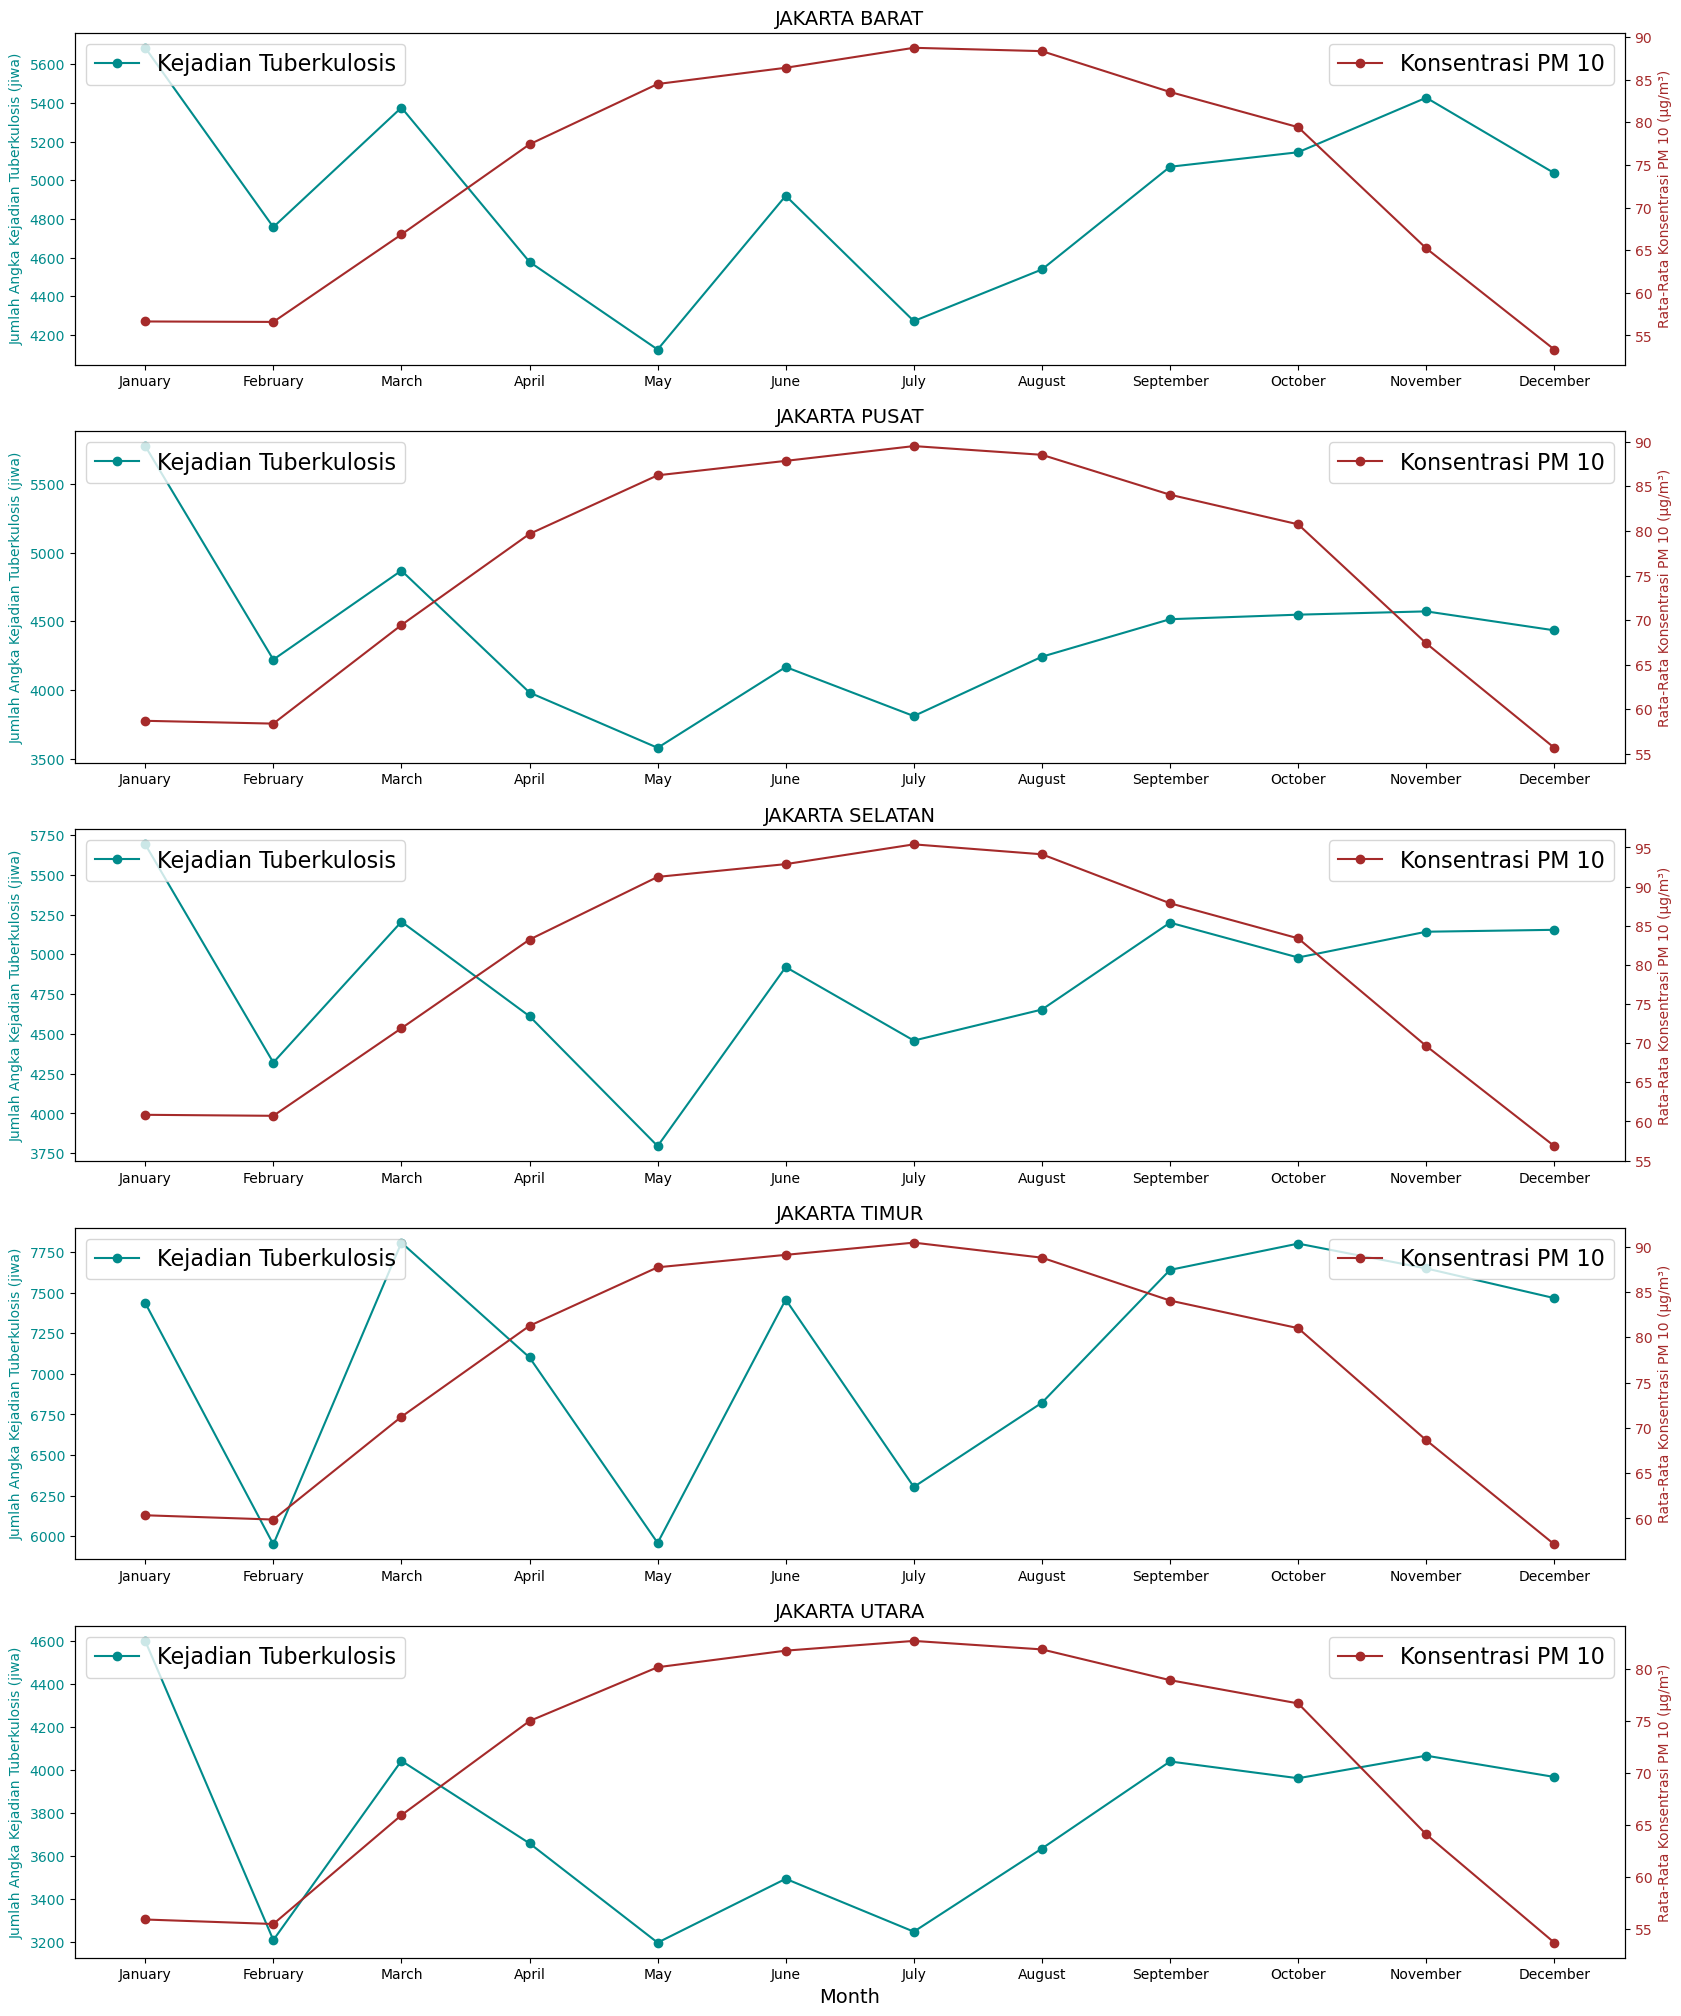

In [79]:
indicators = ['tb', 'pm10']

# Group data by KABKOT
grouped_data = df_tb_pm10.groupby('KABKOT')

# Plot time series for 'tb' and 'pm10' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['pm10']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Angka Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Konsentrasi PM 10', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Konsentrasi PM 10 (µg/m³)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()